<center><h1>Language Model Transformer</h1></center>
<center><h2>Deep Learning Project</h2></center>
<center><h3>Submitted by Anand Prakash Saini</h3></center>

## **~Large~ Small Language Model**

## **Objective**
Implement a transformer-based, character-level language model (GPT-like) and train it on the Shakespeare dataset. In the end generate Shakespearean-like text given a seed string.

## What is Transformer?

Transformers are a type of neural network architecture that rely predominantly on attention mechanisms.

Unlike previous models that processed data sequentially (like RNNs and LSTMs), transformers process entire sequences of data simultaneously. This parallel processing significantly speeds up training.

Transformers, as introduced in the influential paper "Attention Is All You Need," have revolutionized the field of natural language processing (NLP). Following is the architecture of the transformer described in the paper, there's an encoder and a decoder

> 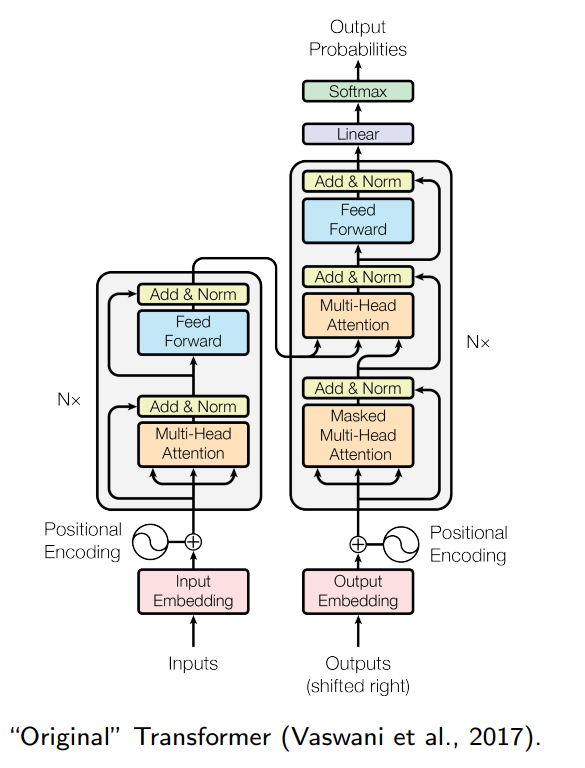

### Decoder Only Transformer for Text Generation:
Our task for this project is related to text generation which means that we will have to predict the next character based on only data seen before or upto that point. We will talk about this in more detail below.Follwing is a simplified Decoder only structure. We will talk about each and ecery component in this architecture one by one.

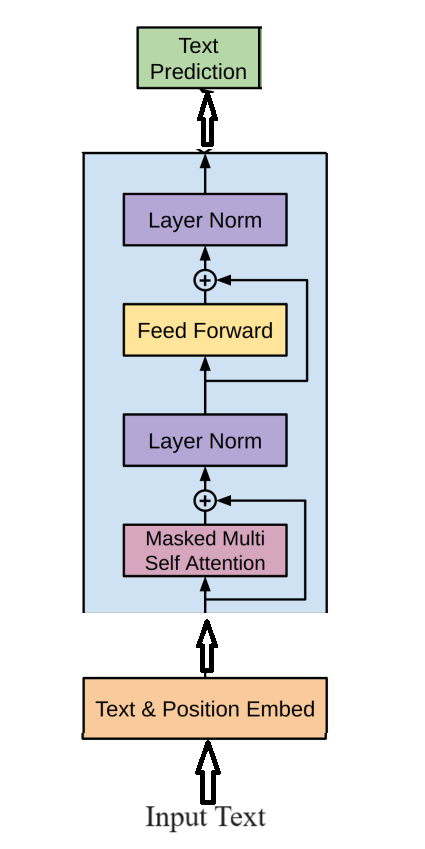

## 1. Input Data Tokenization:
Tokenization is a fundamental step where text is divided into smaller units called tokens. These tokens can be words, characters, or subwords. IN our case we will do the character level tokenization.Splits text into individual characters. Example: "Hello" → ["H", "e", "l", "l", "o"].

- Input Text: The raw text is input into the tokenization process.
- Tokenization Algorithm: The chosen algorithm splits the text into the desired tokens based on predefined rules or learned patterns.
- Output Tokens: The output is a list of tokens, which becomes the input for further NLP tasks.

## 2. Embedding:
Refers to the process of converting textual tokens (like words, characters, or subwords) into numerical vectors. This transformation is crucial as it enables machine learning models to process and understand textual data.

## 3. Positional Embedding:
It addresses a specific challenge: how to represent the order of tokens in a sequence when the model processes the entire sequence simultaneously.

In traditional neural network architectures for NLP, such as RNNs (Recurrent Neural Networks), the sequential nature inherently captures the order of tokens. However, in Transformer models, which process input tokens in parallel, the notion of order isn't naturally present.

Positional embeddings are additional inputs to the Transformer model that encode the position (or order) of tokens in the sequence. This allows the model to understand the sequence order.

**How Positional Embeddings Work:**

- Each token in the sequence is associated with a positional embedding vector, which is usually added to the token's embedding vector. This results in a combined embedding that contains information about both the token itself and its position in the sequence.

- The positional embeddings are learned during the training process, allowing the model to develop an internal representation of token order.

- When generating text, the Transformer uses the combined information of token embeddings and positional embeddings to produce contextually relevant and sequentially coherent output.

- The model predicts the next token based on the embeddings of all previous tokens, taking into account both their individual meanings and their positions in the sequence.

- Example:Consider a sentence being generated: "The cat sat on the". As the model processes this input to predict the next word, it doesn't just use the meanings of "the", "cat", "sat", "on", "the", but also where these words occur in the sequence. Positional embeddings encode this 'where'.- 

## 4. Decoder Block:

### 4.1 Self Attention Mechanism:
Self-attention allows each position in the input sequence to attend to all positions in the previous layer of the sequence. This means that instead of processing each word or token in isolation, the model looks at other words in the input to better understand the context.


Each token in the input sequence is transformed into three different vectors: a Query (Q), a Key (K), and a Value (V). These vectors are obtained by multiplying the input vector by three matrices that are learned during training.

**Query:** Represents the token that is currently being processed.

**Key:** Represents the tokens that are to be attended to.

**Value:** Contains the information from each token that should be used to compute the output.

>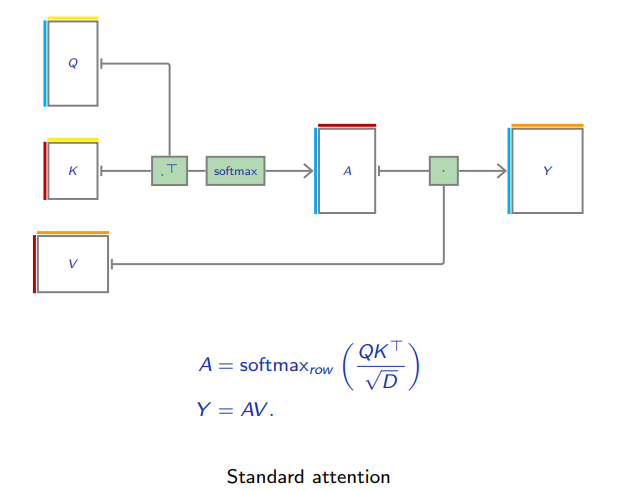

> 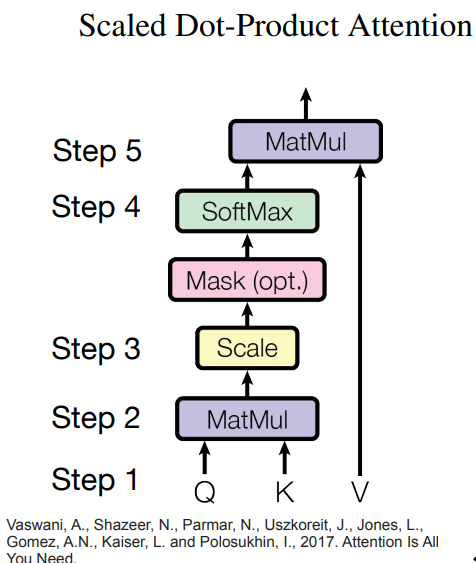

For each token, an attention score is calculated by taking the dot product of its Query vector with the Key vector of every other token. This score determines how much focus to put on other parts of the input sequence when processing this specific token.

> 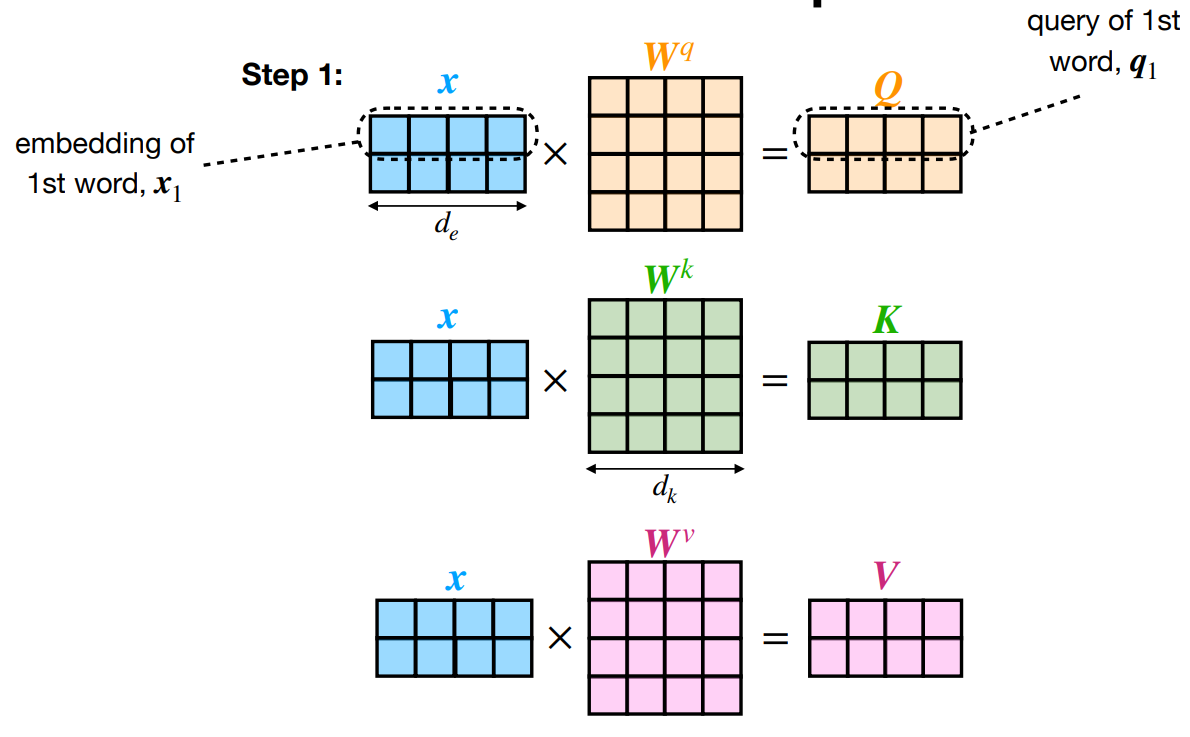

The intuition here is that tokens relevant to each other will yield higher dot products (attention scores).

The attention scores are then normalized using a softmax function, so they sum up to 1. This normalization makes it easier for the model to learn and stabilizes the gradients.

> 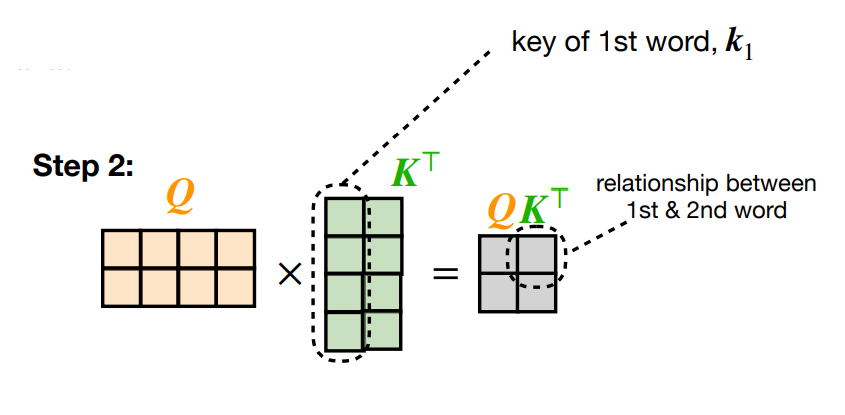

The normalized scores are multiplied with the Value vectors, and the results are summed up to produce the final output for each token.

> 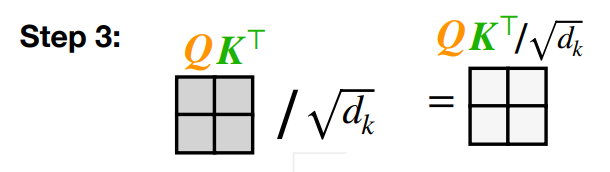

> 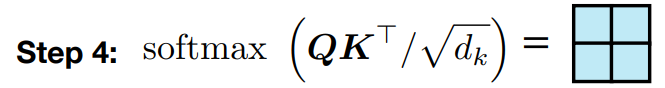

> 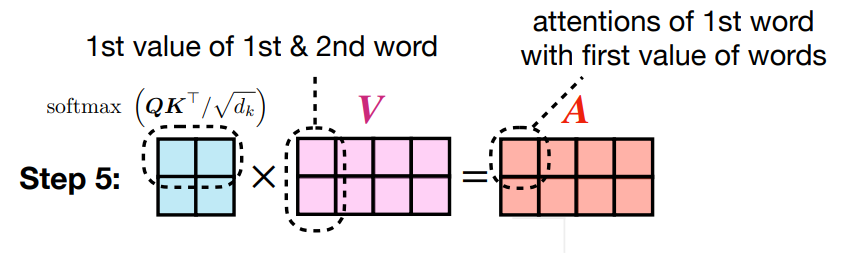

### 4.2 Multi Head Attention:

Multi-head attention repeats the self-attention process multiple times (heads) in parallel. The idea is that each head captures different aspects or relationships within the data.

Each head has its own set of Query, Key, and Value matrices, allowing it to focus on different parts of the input sequence. For example, one head might focus on the syntactic aspects, while another might capture semantic relationships.
This diversity enables the model to consider multiple perspectives, leading to a richer understanding of the context.

The outputs of all heads are concatenated and then passed through another linear transformation to produce the final output. This step combines the different perspectives captured by each head.

> 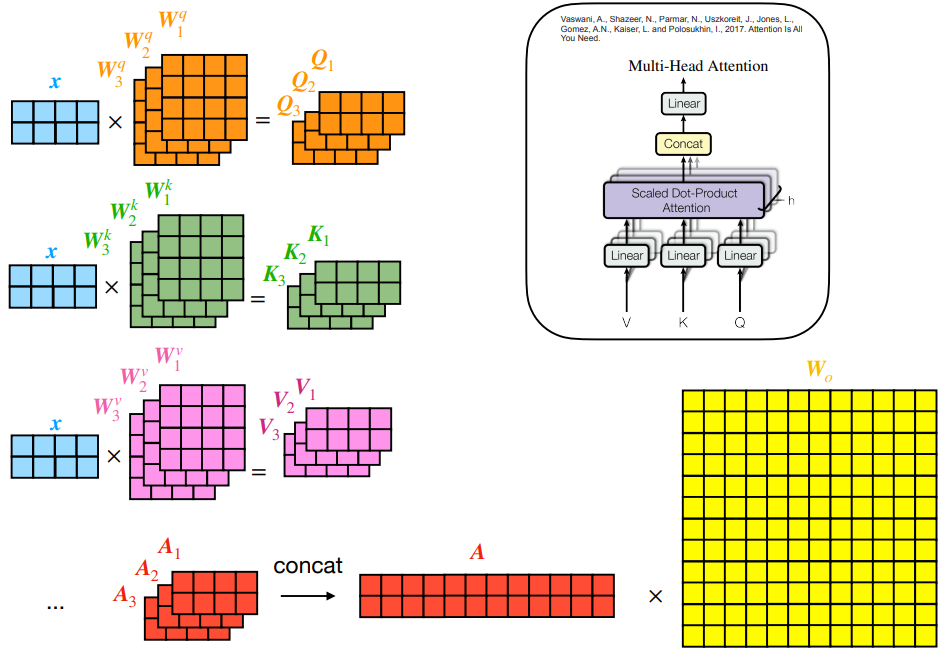

### 4.3 Masked Multi-Head Attention:

In a standard multi-head attention mechanism, each position in the sequence can attend to all positions in the previous layer of the sequence.masked attention ensures that each token is predicted solely based on preceding tokens, mimicking the way humans write or speak (sequentially, without knowledge of future words).

This is achieved by modifying the attention scores before they are passed through the softmax layer.

When calculating self-attention, future positions are masked (set to a very large negative value) so that after applying the softmax, these positions have an attention weight close to zero. This ensures that during the prediction of a particular token, the model cannot "see" the future tokens.

Example: Suppose you have a sequence, "The quick brown fox jumps". When predicting the word "jumps", the model should not have access to this word or any words that come after it (if any). Masked attention ensures that the attention mechanism only considers "The quick brown fox" for this prediction.

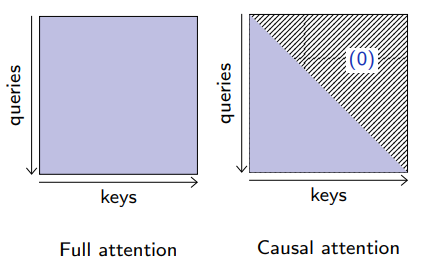

> 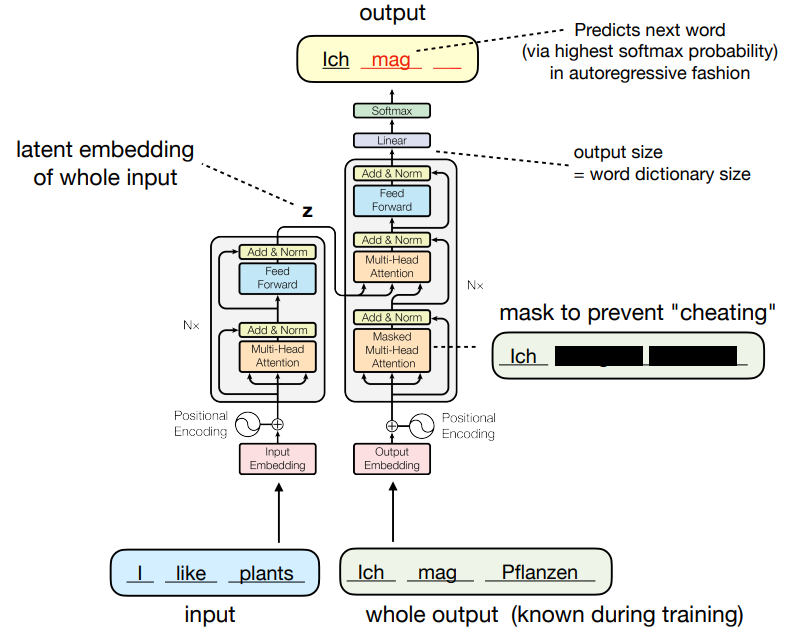

### 4.4 Residual/Skip Connection

It allows the output of one layer to bypass one or more intermediate layers and be added directly to the output of a later layer.
 
In our case of a decoder block, the output from the masked multi-head attention layer and the feed-forward network is added to their respective inputs before being passed to the next layer or process.

**Benefits:**

- *Mitigating Vanishing Gradients:* Deep neural networks often suffer from the vanishing gradient problem, where gradients become increasingly small, impeding the learning process. Residual connections help alleviate this by allowing gradients to flow more directly through the network.

- *Enhancing Learning:* By adding the input directly to the output, the network can preserve the original information, which makes learning easier and more efficient, especially in deep networks.

- Essentially, a residual connection implements the formula output = F(x) + x, where F(x) is the output from the network layers, and x is the original input. This approach allows the network to learn modifications to the identity function rather than learning from scratch, making training deeper models more feasible.

### 4.5 Layer Normalization:

Layer normalization is a technique used to normalize the inputs across the features for each data sample individually. It computes the mean and variance used for normalization from all of the summed inputs to the neurons in a layer on a single training case.

- **Stable Training:** It helps in stabilizing the training process, as it ensures that the distribution of the inputs to a layer doesn't change much across different mini-batches, which is a problem known as internal covariate shift.

- **Faster Convergence:** By normalizing the input layer, the model often converges faster, as it prevents the network from getting into regions where the activation functions (like sigmoid or tanh) saturate and gradients vanish.

- **Reduced Sensitivity to Hyperparameter Settings:** Models with layer normalization tend to be less sensitive to the initialization of parameters and learning rate settings.

Implementation:

After the residual connection, the combined output is normalized so that it has a mean of zero and a standard deviation of one across the features. This step is performed before passing the data to the next layer or the next block in the sequence.

### 4.6 Feed-Forward Neural Network:

**Two Linear Transformations with a Non-Linearity:**

- The FFNN consists of two linear (or fully connected) layers separated by a non-linear activation function.

- The first linear layer expands the dimensionality of the input, and the second one compresses it back to the original dimensionality.

**Activation Function:**

- Between these two linear layers, a non-linear activation function is applied. Commonly used functions include ReLU (Rectified Linear Unit).

- This non-linearity allows the network to capture more complex patterns in the data, which linear operations alone cannot.

**Role in the Decoder Block**

- **Processing Each Position Independently:** Unlike the self-attention mechanism that processes the entire sequence in a collective manner, the FFNN operates on each position independently. It means that for each token's embedding, the FFNN performs the same operation but does not consider other positions in the sequence during this step.

- **Complex Representation Learning:** The FFNN further transforms the output of the self-attention layer, allowing the model to learn more complex representations. This is important for tasks like language modeling, where understanding nuanced patterns and relationships in the data is key.

- **Contribution to Model’s Capacity:** The FFNN significantly contributes to the model's capacity (i.e., its ability to model complex phenomena) without increasing the dependencies between different positions in the sequence. This is vital for maintaining the parallelizability of the Transformer architecture.

The FFNN adds an extra layer of flexibility and power to the Transformer model. While the self-attention layers capture the relationships between different tokens in the sequence, the FFNN allows the model to refine and transform these representations independently for each token.

### 4.7 Linear Layer:

The linear layer is a fully connected neural network layer that maps the output of the decoder blocks to a different space. The output from the decoder blocks is a set of vectors, where each vector represents the transformed representation of an input token after passing through the entire decoder stack.

The linear layer takes these vectors and transforms them into a new space, typically with dimensionality equal to the size of the model's vocabulary.

This transformation is essential for preparing the decoder output for the final step in the model's output generation process. For tasks like language generation, this means getting the model's output ready for the token prediction step.

### 4.8 Softmax Layer:

The output of the linear layer, often referred to as "logits," is a set of raw predictions that the model makes for each token in the vocabulary. These logits are real-valued scores for each word in the vocabulary.

The softmax layer converts these logits into a probability distribution. It does this by applying the softmax function, which normalizes the logits such that the sum of the probabilities of all possible tokens equals one.

$$ \text{softmax}(x_{i}) = \frac{\exp(x_{i})}{\sum(\exp(x_{j}))}$$

for each $x_{i}$ in the logits vector, where the summation is over all possible tokens.

This transformation ensures that each element of the output vector is in the range (0, 1), making it a valid probability. The higher the logit score for a token, the higher its probability after applying softmax

### 4.9 Output Probabilities:

The softmax layer's output gives the probability of each token being the next one. The model selects the token with the highest probability as its prediction.

### Input Data

In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F
with open('shakespeare_data.txt', 'r', encoding='utf-8') as f:
    text = f.read()
# First 1000 Characters
print(text[:500])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


### Tokenization of Input text

#### Converting Characters to Integers

In [2]:
chars = sorted(list(set(text))) # All the characters there in the dataset.
vocab_size = len(chars) # Number of unique characters

stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: Convert strint to integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: Convert Integers back to strings

data = torch.tensor(encode(text), dtype=torch.long) # COnvert entire dataset characters into integers.

In [3]:
string = "Deep Learning"
print('For Example take the string "{}" of {} Characters'. format(string, len(string)))

print('Encoding of strings: ', encode(string))

print('Decoding of Integers: ', decode(encode(string)))

For Example take the string "Deep Learning" of 13 Characters
Encoding of strings:  [16, 43, 43, 54, 1, 24, 43, 39, 56, 52, 47, 52, 45]
Decoding of Integers:  Deep Learning


#### Trian Test Split : To get a sense of overfitting.

In [4]:
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [5]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

#### We give small chunks of some size (Block Size/Context length) and many batches of these chunks during training.

Visualizing these chunks and multiple batches i.e. 8 and 4 with sequence and targets in our example below:

In [6]:
torch.manual_seed(1337)
batch_size = 4 # Independent sequences processed in parallel
block_size = 8 # Maximum context length for predictions
device = 'cuda' if torch.cuda.is_available() else 'cpu'
input_batch, output_batch = get_batch('train')
print('Inputs:')
print(input_batch.shape)
print(input_batch)
print('Targets: Shifted version')
print(output_batch.shape)
print(output_batch)

Inputs:
torch.Size([4, 8])
tensor([[53, 59,  6,  1, 58, 56, 47, 40],
        [49, 43, 43, 54,  1, 47, 58,  1],
        [13, 52, 45, 43, 50, 53,  8,  0],
        [ 1, 39,  1, 46, 53, 59, 57, 43]])
Targets: Shifted version
torch.Size([4, 8])
tensor([[59,  6,  1, 58, 56, 47, 40, 59],
        [43, 43, 54,  1, 47, 58,  1, 58],
        [52, 45, 43, 50, 53,  8,  0, 26],
        [39,  1, 46, 53, 59, 57, 43,  0]])


In [7]:
class Head(nn.Module):
    """ One head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Input of size (batch, time-step, channels)
        # Output of size (batch, time-step, head size)
        B,T,C = x.shape
        k = self.key(x)   # (B,T,hs)
        q = self.query(x) # (B,T,hs)
        # Compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * k.shape[-1]**-0.5 # (B, T, hs) @ (B, hs, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # Perform the weighted aggregation of the values
        v = self.value(x) # (B,T,hs)
        out = wei @ v # (B, T, T) @ (B, T, hs) -> (B, T, hs)
        return out

In [8]:
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(head_size * num_heads, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

In [9]:
class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

In [10]:
class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

In [11]:
class GPTLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

        # Better init
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss
    
    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

#### Hyperparameters:

- **batch_size:** (32) The number of independent sequences processed in parallel during training. In each training step, the model will process 32 sequences simultaneously. A larger batch size typically allows for more stable and reliable gradient estimates, but at the cost of higher memory usage.
block_size = 64

- **block_size:** (64) The maximum context length for predictions, i.e., the maximum number of tokens from the input sequence that the model will consider for generating the next token. It defines the size of the window of tokens that the model looks at while making predictions.

- **max_iters:** (1000) The maximum number of iterations (or steps) during the training process. This is essentially the stopping criterion for the training loop, determining how long the model will train.

- **eval_interval:** (100) The frequency (in terms of training iterations) at which the model's performance is evaluated on a validation set or with some evaluation metric. For instance, every 100 training iterations, the model's performance is assessed.

- **learning_rate:** (0.0003) The learning rate for the optimizer. It determines the step size at each iteration while moving toward a minimum of the loss function. A smaller learning rate requires more training epochs but provides more reliable convergence.

- **device:** ('cuda' if available, otherwise 'cpu') Determines the computing device for training the model. If a CUDA-capable GPU is available (torch.cuda.is_available() returns True), it uses the GPU ('cuda') for faster computation; otherwise, it defaults to the CPU.

- **eval_iters:** (200) The number of iterations for which the model runs in evaluation mode during the evaluation phase. It's how long you evaluate the model for, in terms of iterations.

- **n_embd:** (96) The dimensionality of the embedding layers (both token and positional embeddings). This is the size of the vectors that each token is transformed into before being processed by the model.

- **n_head:** (3) The number of heads in the multi-head attention mechanism. Each head captures different aspects of the attention mechanism, and having multiple heads allows the model to focus on different parts of the input sequence simultaneously.

- **n_layer:** (3) The number of Transformer blocks (layers) in the model. Each layer consists of components like multi-head attention and feed-forward networks. More layers can capture more complex patterns but also make the model larger and slower to train.

- **dropout:** (0.2) The dropout rate used in the model, specifically in the attention and feed-forward layers. Dropout is a regularization technique where randomly selected neurons are ignored during training. It helps prevent overfitting by making the model less sensitive to specific weights. A dropout rate of 0.2 means 20% of the elements are zeroed out.

In [12]:
# hyperparameters
batch_size = 32 # how many independent sequences will we process in parallel?
block_size = 64 # what is the maximum context length for predictions?
max_iters = 1000 
eval_interval = 100
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 96
n_head = 3
n_layer = 3
dropout = 0.2

In [13]:
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

The estimate_loss function evaluates the model's performance by calculating the average loss on both the training and validation datasets.

It operates in a non-gradient context (to optimize memory and computation) and temporarily sets the model to evaluation mode to ensure accuracy in metrics.

The function iteratively processes batches of data for a specified number of iterations (eval_iters), computes the loss for each batch, and stores these values. 

After averaging these losses for each dataset (training and validation), the model is set back to training mode. 

The function returns a dictionary containing the average losses for both data splits, providing insights into the model's performance without impacting its training state.

In [14]:
model = GPTLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

0.353537 M parameters


In [15]:
# Create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Define the number of epochs
num_epochs = 5  # Number of epochs

for epoch in range(num_epochs):
    model.train()  # Ensure the model is in training mode

    # Loop over batches
    for i in range(max_iters):
        # Calculate the current step (iteration) in the overall training process
        current_step = epoch * max_iters + i

        # Sample a batch of data
        xb, yb = get_batch('train')

        # Evaluate the loss
        logits, loss = model(xb, yb)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

        # Evaluate loss on train and val sets periodically
        if current_step % eval_interval == 0 or current_step == (num_epochs * max_iters - 1):
            losses = estimate_loss()
            print(f"Epoch {epoch + 1}/{num_epochs}, Step {current_step + 1}/{num_epochs * max_iters}: "
                  f"train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")


Epoch 1/5, Step 1/5000: train loss 4.0675, val loss 4.0680
Epoch 1/5, Step 101/5000: train loss 2.7499, val loss 2.7635
Epoch 1/5, Step 201/5000: train loss 2.5522, val loss 2.5516
Epoch 1/5, Step 301/5000: train loss 2.4660, val loss 2.4699
Epoch 1/5, Step 401/5000: train loss 2.4193, val loss 2.4189
Epoch 1/5, Step 501/5000: train loss 2.3253, val loss 2.3279
Epoch 1/5, Step 601/5000: train loss 2.2157, val loss 2.2282
Epoch 1/5, Step 701/5000: train loss 2.1294, val loss 2.1577
Epoch 1/5, Step 801/5000: train loss 2.0753, val loss 2.1114
Epoch 1/5, Step 901/5000: train loss 2.0223, val loss 2.0767
Epoch 2/5, Step 1001/5000: train loss 1.9820, val loss 2.0509
Epoch 2/5, Step 1101/5000: train loss 1.9475, val loss 2.0201
Epoch 2/5, Step 1201/5000: train loss 1.9121, val loss 1.9920
Epoch 2/5, Step 1301/5000: train loss 1.8796, val loss 1.9763
Epoch 2/5, Step 1401/5000: train loss 1.8636, val loss 1.9728
Epoch 2/5, Step 1501/5000: train loss 1.8447, val loss 1.9582
Epoch 2/5, Step 1601

The generate_text function generates a text sequence using a trained GPT-like language model, starting from a given prompt and continuing up to a specified maximum length. 

The function sets the model to evaluation mode, tokenizes the input prompt, and then uses the model to generate a sequence of tokens. 

These tokens are then decoded back into human-readable text and returned as the output. 

In [17]:
def generate_text(prompt, max_length=200):
    """
    Generate text using the trained GPTLanguageModel.
    
    :param prompt: Initial string to start the generation.
    :param max_length: Maximum length of the generated sequence including the prompt.
    :return: Generated text.
    """
    model.eval()  # Ensure the model is in evaluation mode

    # Tokenize the prompt
    tokenized_prompt = encode(prompt)
    idx = torch.tensor([tokenized_prompt], dtype=torch.long).to(device)

    # Generate tokens
    with torch.no_grad():
        generated_idx = model.generate(idx, max_length - len(tokenized_prompt))

    # Decode the generated tokens to a string
    generated_text = decode(generated_idx[0].cpu().tolist())
    return generated_text
prompt = "O god, O god"
generated_text = generate_text(prompt, max_length=100)
print(generated_text)

O god, O god preson.

QUEEN SABELLA:
Are slek, or Greforder you
To that ulmes days hands a fair word
